In [1]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt  #to show color based segmentation / histogram

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

1. Write a program to segment the boat and the people on it from the background. Follow the instruction below:
- Use 'boat.jpg' as input.
- Apply Otsu thresholding.
- Draw bounding box to identify the region where the boat and people are located.

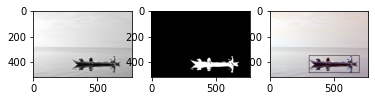

In [15]:
#Question 1

img = cv.imread("boat.jpg")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

blur = cv.GaussianBlur(img_gray, (5, 5), 0)   # the third argument here is standard deviation
ret, th1 = cv.threshold(blur, 127, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

img_copy = img.copy()
cv.rectangle(img_copy, (303,346), (692,480), (0,0,0), 2 , cv.LINE_AA)

plt.subplot(1,3,1)
plt.imshow(img_gray, cmap = 'gray')

plt.subplot(1,3,2)
plt.imshow(th1, cmap = 'gray')

plt.subplot(1,3,3)
plt.imshow(img_copy)

plt.show()

2. Write a program to visualize the effect of size of structuring element on the morphological transformation (e.g. erosion, dilation, opening, and closing).

- Load the 'leaf.jfif' and perform thresholding to segment the leaf from the background.
- Create a GUI containing trackbar to control the size of structuring element and display the resulting image on a window alongside the trackbar.

In [6]:
img = cv.imread("leaf.jfif", 0)
# Otsu's threshold after Gaussian filtering
#blur = cv.GaussianBlur(img, (5, 5), 0)   # the third argument here is standard deviation
ret, img_binary = cv.threshold(img, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

def trackbar(x):
    kernel = np.ones((x, x), dtype = np.uint8)
    img_erode = cv.erode(img_binary, kernel, iterations = 1)
    
    cv.imshow('window', np.hstack([img_binary, img_erode]))

# cv.imshow('window', img)
cv.namedWindow('window')
cv.createTrackbar('kernel', 'window', 3, 10, trackbar)

cv.waitKey(0)
#create custom 2d arraycv.destroyAllWindows()


-1

3. Apply the steps shown in exercise 4 to segment the porcelain from these images: "porcelain1.jfif" - "porcelain5.jfif".



In [77]:
def segment_porcelain(img):
    hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    
    #set the blue color range in hsv color space
    blue_low = (50, 0, 10)
    blue_up = (179, 256, 256)
    
    #apply the blue mask
    mask = cv.inRange(hsv, blue_low, blue_up)
    
    # AND operation to perform the segmentation
    res = cv.bitwise_and(img, img, mask = mask)
    
    #clean up the segmentation using nlur filter
    blur = cv.GaussianBlur(res, (5, 5), 0)
    return blur

filename = "porcelain"

resize_dim = (250, 250)

porcelain_list = []
for i in range(1, 6):
    img_porcelain = cv.resize(cv.imread(filename + str(i) + ".jfif"), resize_dim)
    porcelain = cv.cvtColor(img_porcelain, cv.COLOR_BGR2RGB)
    porcelain_list.append(porcelain)

results = [segment_porcelain(porcelain) for porcelain in porcelain_list]

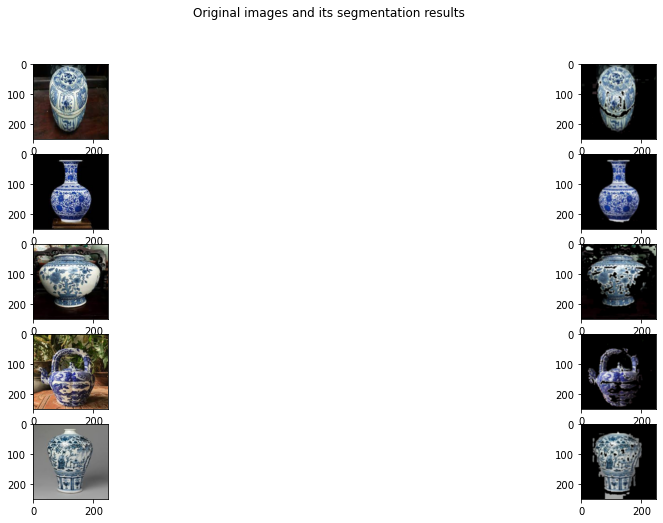

In [78]:
#Initiate a big figure
#plt.figure(figsize = (18, 8))

f, ax = plt.subplots(5, 2, figsize = (18, 8))

for i in range(5):
    ax[i][0].imshow(porcelain_list[i])
    ax[i][1].imshow(results[i])
    
f.suptitle("Original images and its segmentation results")
plt.show()